In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from src.nflow_utils import *
import os
from src.utils import *

In [3]:
from nflows import transforms, distributions, flows
import torch
import torch.nn.functional as F
from nflows.distributions import uniform
from sklearn.utils import shuffle
# import train_test_split
from sklearn.model_selection import train_test_split

In [4]:
import pickle

In [6]:


a = 0.001 

if a:
    print('a')
    print(a)

a
0.001


In [5]:
#os.environ["CUDA_VISIBLE_DEVICES"]='2'


CUDA = True
device = torch.device("cuda:0" if CUDA else "cpu")

kwargs = {'num_workers': 4, 'pin_memory': True} if CUDA else {}
kwargs = {}


In [6]:
cd ..

/home/rd804/m-anode


In [7]:
with open('data/data.pkl', 'rb') as f:
    data = pickle.load(f)

back_mean = 0
sig_mean = 3
sig_simga = 0.5
back_sigma = 3

with open('data/true_w.pkl', 'rb') as f:
    true_w = pickle.load(f)

with open('data/background.pkl', 'rb') as f:
    background = pickle.load(f)


# fit train data
best_parameters = {}
run = 0

sig_train = 10

best_parameters[str(sig_train)] = {}

# Load train data
x_train = data[str(sig_train)]['train']['data']

_X_train = np.concatenate((x_train, background), axis=0)
_y_train = np.concatenate((np.ones(len(x_train)), np.zeros(len(background))), axis=0)






_X_train, _y_train  = shuffle(_X_train, _y_train, random_state=10)


X_train , X_val = train_test_split(_X_train, test_size=0.5, random_state=22)
y_train , y_val = train_test_split(_y_train, test_size=0.5, random_state=22)


In [8]:
x_test = data['10']['val']['data']
label_test = data['10']['val']['label']

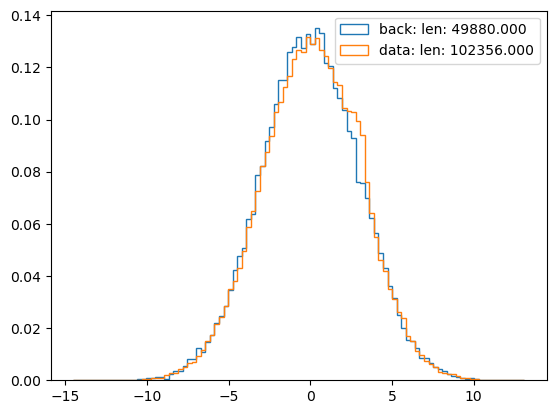

In [8]:
bins = np.linspace(min(X_train), max(X_train), 100)

plt.hist(X_train[y_train==0], bins=bins, label='back: len: %.3f' % len(X_train[y_train==0]) , density=True, histtype='step')
plt.hist(X_train[y_train==1], bins=bins, label='data: len: %.3f' % len(X_train[y_train==1]), density=True, histtype='step')
plt.legend()
#plt.hist(, bins=100, alpha=0.5, label='val', density=True, histtype='step')
plt.show()

In [9]:
# define X_train y_train to be used for loading to dataloader

batch_size = 128

X_train = torch.from_numpy(X_train.reshape(-1,1)).float()
y_train = torch.from_numpy(y_train.reshape(-1,1)).float()

X_val = torch.from_numpy(X_val.reshape(-1,1)).float()
y_val = torch.from_numpy(y_val.reshape(-1,1)).float()

traindataset = torch.utils.data.TensorDataset(X_train, y_train)
trainloader = torch.utils.data.DataLoader(traindataset, batch_size=batch_size, shuffle=True)

valdataset = torch.utils.data.TensorDataset(X_val, y_val)
valloader = torch.utils.data.DataLoader(valdataset, batch_size=batch_size*5, shuffle=False)



In [10]:
torch.sigmoid(torch.tensor([0]))

tensor([0.5000])

In [11]:
model_S=define_model(nfeatures=1,nhidden=2,hidden_size=20,embedding=None,dropout=0,nembedding=0, device=device)
model_B=define_model(nfeatures=1,nhidden=2,hidden_size=20,embedding=None,dropout=0,nembedding=0, device=device)

w = torch.tensor(0, requires_grad=True, device=device)

optimizer = torch.optim.Adam(list(model_S.parameters()) + list(model_B.parameters()) + [w])

In [12]:
valloss = []
trainloss = []




for epoch in range(10):

    train_loss = m_anode(model_S,model_B,w,optimizer,trainloader,noise_data=0,noise_context=0, device=device, mode='train')
    val_loss = m_anode(model_S,model_B,w,optimizer,valloader,noise_data=0,noise_context=0, device=device, mode='val')

    valloss.append(val_loss)
    trainloss.append(train_loss)

    print('epoch: %d, train_loss: %.3f, val_loss: %.3f' % (epoch, train_loss, val_loss))

 #   if epoch % 5 == 0:
  #      torch.save(model_S.state_dict(), 'models/model_S_%d_%d.pth' % (sig_train, epoch))
   #     torch.save(model_B.state_dict(), 'models/model_B_%d_%d.pth' % (sig_train, epoch))
    #    torch.save(w, 'models/w_%d_%d.pth' % (sig_train, epoch))




epoch: 0, train_loss: -1620365.440, val_loss: -21412527.617
epoch: 1, train_loss: -47690918.396, val_loss: -68478846.234
epoch: 2, train_loss: -90024416.492, val_loss: -104036241.031
epoch: 3, train_loss: -110571629.896, val_loss: -125661193.062
epoch: 4, train_loss: -143651900.625, val_loss: -157802072.562
epoch: 5, train_loss: -179033925.922, val_loss: -196542964.500
epoch: 6, train_loss: -215734991.070, val_loss: -234194457.312
epoch: 7, train_loss: -253151462.523, val_loss: -271589726.750
epoch: 8, train_loss: -290654830.742, val_loss: -309070625.375
epoch: 9, train_loss: -328212884.297, val_loss: -342453765.000


In [13]:
print(w.item())

13.70766830444336


In [1]:
plt.plot(valloss, label='val')
plt.plot(trainloss, label='train')
plt.legend()
plt.show()

NameError: name 'plt' is not defined

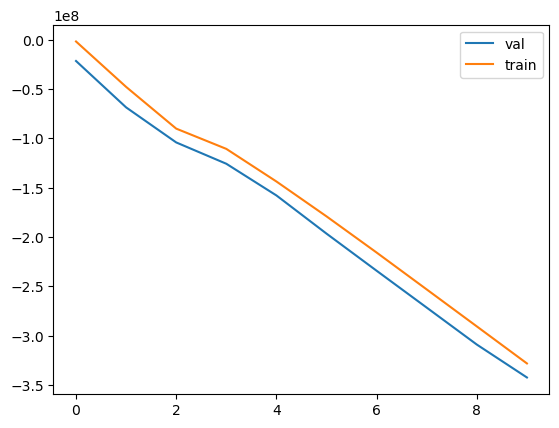

In [16]:
valloss_list=np.array(valloss_list)
min_epoch=np.argmin(valloss_list)
print('min epoch: ',min_epoch)

NameError: name 'valloss_list' is not defined

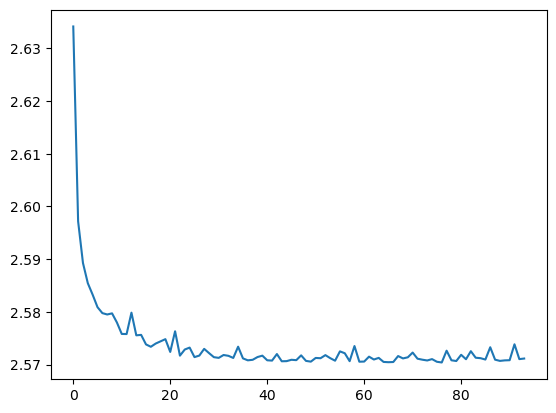

In [ ]:
plt.plot(valloss_list)
plt.show()

In [ ]:
model.load_state_dict(torch.load('models/model_'+str(sig_train)+'/model_SR_'+str(min_epoch)+'.pt'))
model.eval()
with torch.no_grad():
    samples=model.sample(50000)
samples=samples.cpu().detach().numpy().reshape((-1))

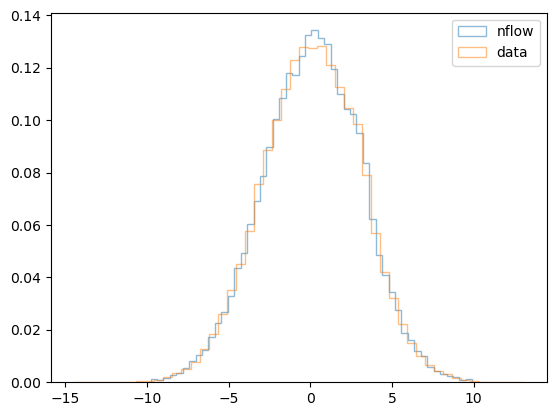

In [ ]:
_=plt.hist(samples,bins=50, density=True, alpha=0.5, histtype='step', label='nflow')
_=plt.hist(x_val,bins=50, density=True, alpha=0.5, histtype='step', label='data')
plt.legend(loc='upper right')
plt.show()

In [ ]:
valloss_list=np.array(valloss_list)
min_epoch=np.argmin(valloss_list)
print('min epoch: ',min_epoch)

min epoch:  76


In [ ]:
background_train , background_val = train_test_split(background, test_size=0.5, random_state=22)

In [ ]:
background_train_tensor = torch.from_numpy(background_train.astype('float32').reshape((-1,1)))
background_val_tensor = torch.from_numpy(background_val.astype('float32').reshape((-1,1)))

In [ ]:
batch_size = 256
background_train_loader = torch.utils.data.DataLoader(background_train_tensor, batch_size=batch_size, shuffle=True)
background_val_loader = torch.utils.data.DataLoader(background_val_tensor, batch_size=batch_size*6, shuffle=False)


In [ ]:
model_background=define_model(nfeatures=1,nhidden=2,hidden_size=20,embedding=None,dropout=0,nembedding=0)

In [ ]:
# train
if not os.path.exists('models/model_'+str(sig_train)):
    os.makedirs('models/model_'+str(sig_train))

valloss_list_background=[]
optimizer = torch.optim.Adam(model_background.parameters(),lr=1e-4) #,lr=1e-4)#, lr=1e-4)

for epoch in range(100):
    print('\n Epoch: {}'.format(epoch))
    train(model_background,optimizer,background_train_loader ,noise_data=0.,noise_context=0.0)
    valloss=val(model_background,background_val_loader)
   # print('epoch '+str(epoch)+' val loss: ',valloss)
    # save model each epoch
    torch.save(model_background.state_dict(), 'models/model_'+str(sig_train)+'/model_CR_'+str(epoch)+'.pt')

    valloss_list_background.append(valloss)
print('done')



 Epoch: 0

 Epoch: 1

 Epoch: 2

 Epoch: 3

 Epoch: 4

 Epoch: 5

 Epoch: 6

 Epoch: 7

 Epoch: 8

 Epoch: 9

 Epoch: 10

 Epoch: 11

 Epoch: 12

 Epoch: 13

 Epoch: 14

 Epoch: 15

 Epoch: 16

 Epoch: 17

 Epoch: 18

 Epoch: 19

 Epoch: 20

 Epoch: 21

 Epoch: 22

 Epoch: 23

 Epoch: 24

 Epoch: 25

 Epoch: 26

 Epoch: 27

 Epoch: 28

 Epoch: 29

 Epoch: 30

 Epoch: 31

 Epoch: 32

 Epoch: 33

 Epoch: 34

 Epoch: 35

 Epoch: 36

 Epoch: 37

 Epoch: 38

 Epoch: 39

 Epoch: 40

 Epoch: 41

 Epoch: 42

 Epoch: 43

 Epoch: 44

 Epoch: 45

 Epoch: 46

 Epoch: 47

 Epoch: 48

 Epoch: 49

 Epoch: 50

 Epoch: 51

 Epoch: 52

 Epoch: 53

 Epoch: 54

 Epoch: 55

 Epoch: 56

 Epoch: 57

 Epoch: 58

 Epoch: 59

 Epoch: 60

 Epoch: 61

 Epoch: 62

 Epoch: 63

 Epoch: 64

 Epoch: 65

 Epoch: 66

 Epoch: 67

 Epoch: 68

 Epoch: 69

 Epoch: 70

 Epoch: 71

 Epoch: 72

 Epoch: 73

 Epoch: 74

 Epoch: 75

 Epoch: 76

 Epoch: 77

 Epoch: 78

 Epoch: 79

 Epoch: 80

 Epoch: 81

 Epoch: 82

 Epoch: 83

 

In [ ]:
valloss_list_background=np.array(valloss_list_background)
min_epoch=np.argmin(valloss_list_background)
print('min epoch: ',min_epoch)

min epoch:  98


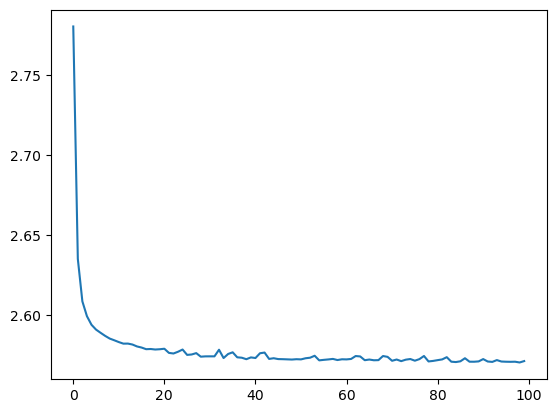

In [ ]:
plt.plot(valloss_list_background)
plt.show()

In [ ]:
min_epoch = 90

model_SR =define_model(nfeatures=1,nhidden=2,hidden_size=20,embedding=None,dropout=0,nembedding=0)
model_SR.load_state_dict(torch.load('models/model_'+str(sig_train)+'/model_SR_'+str(min_epoch)+'.pt'))


<All keys matched successfully>

In [ ]:
min_epoch = 98

model_CR =define_model(nfeatures=1,nhidden=2,hidden_size=20,embedding=None,dropout=0,nembedding=0)
model_CR.load_state_dict(torch.load('models/model_'+str(sig_train)+'/model_CR_'+str(min_epoch)+'.pt'))


<All keys matched successfully>

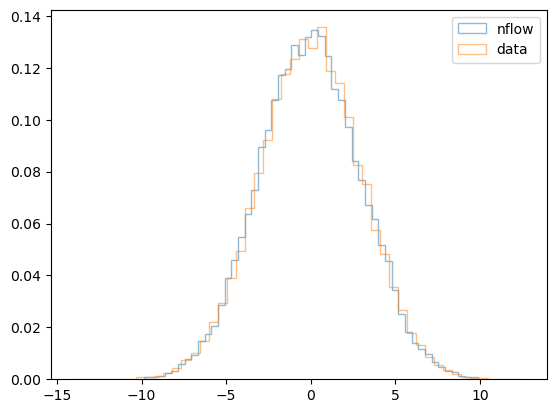

In [ ]:
model_CR.eval()
with torch.no_grad():
    samples=model_CR.sample(50000)
samples=samples.cpu().detach().numpy().reshape((-1))

_=plt.hist(samples,bins=50, density=True, alpha=0.5, histtype='step', label='nflow')
_=plt.hist(background_val,bins=50, density=True, alpha=0.5, histtype='step', label='data')
plt.legend(loc='upper right')
plt.show()

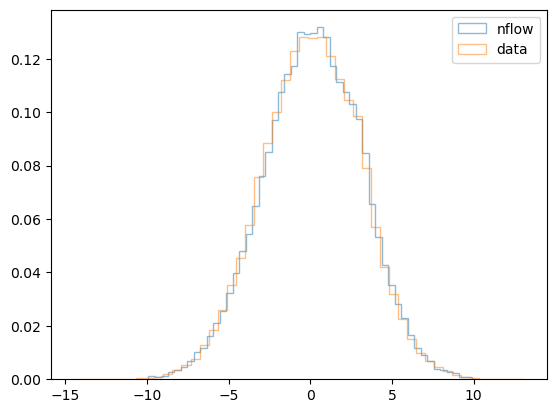

In [ ]:
model_SR.eval()
with torch.no_grad():
    samples=model_SR.sample(100000)
samples=samples.cpu().detach().numpy().reshape((-1))

_=plt.hist(samples,bins=50, density=True, alpha=0.5, histtype='step', label='nflow')
_=plt.hist(x_val,bins=50, density=True, alpha=0.5, histtype='step', label='data')
plt.legend(loc='upper right')
plt.show()

In [ ]:
true_likelihoods = {}

true_likelihoods[str(sig_train)] = {}


w1 = true_w[str(sig_train)][0]
w2 = true_w[str(sig_train)][1]

true_likelihoods[str(sig_train)] = p_data(x_test,[sig_mean, back_mean],[sig_simga**2,back_sigma**2],[w1,w2])/p_back(x_test,back_mean,back_sigma**2)



In [ ]:
score_likelihoods = {}

score_likelihoods[str(sig_train)] = {}

model_SR.eval()
model_CR.eval()
with torch.no_grad():
    log_p = model_SR.log_prob(testtensor.to(device)).cpu().detach().numpy()
    log_q = model_CR.log_prob(testtensor.to(device)).cpu().detach().numpy()
    score_likelihoods[str(sig_train)] = np.exp(log_p - log_q)
    


In [ ]:
label_test

array([0., 0., 0., ..., 1., 1., 1.])

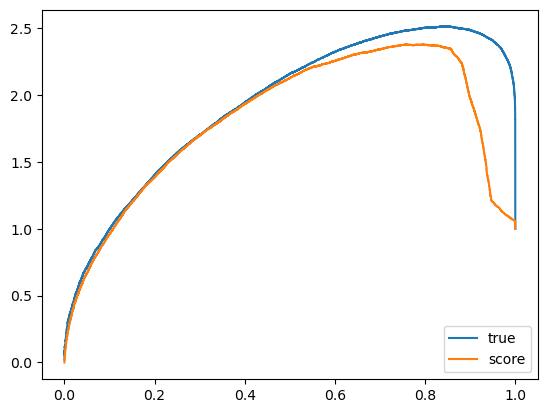

In [ ]:
# compare SICs from score and true likelihoods

sic_true , tpr_true , auc_true = SIC(label_test, true_likelihoods[str(sig_train)])
sic_score , tpr_score , auc_score = SIC(label_test, score_likelihoods[str(sig_train)])

plt.plot(tpr_true, sic_true, label='true')
plt.plot(tpr_score, sic_score, label='score')
plt.legend(loc='lower right')
plt.show()

